which city would you like to check: washington, new york city or chicago? 
chicago
which month would you like to check? Type all to do not apply any filter
all
which day of the week would you like to check? Type all to do not apply any filter 
sunday
Subscriber    23064
Customer      15711
Name: User Type, dtype: int64
During the period selected, out of the  23062  users  69 % were men, and  31 % were women.
The youngest user's birth date is 2004.0  
The oldest user's birth date was  1899.0 
The most common birth date for the users was  0    1989.0
dtype: float64
The most popular month was June
The most popular hour was 15
The most popular starting station was Streeter Dr & Grand Ave 
The most popular end station was Streeter Dr & Grand Ave 
The most popular trip was from Lake Shore Dr & Monroe St to Streeter Dr & Grand Ave
Total travel time(hours):  13393
Average travel time(minutes):  20

 
Below you can see a visualization of the user behaviors depicting the number of trips per hour

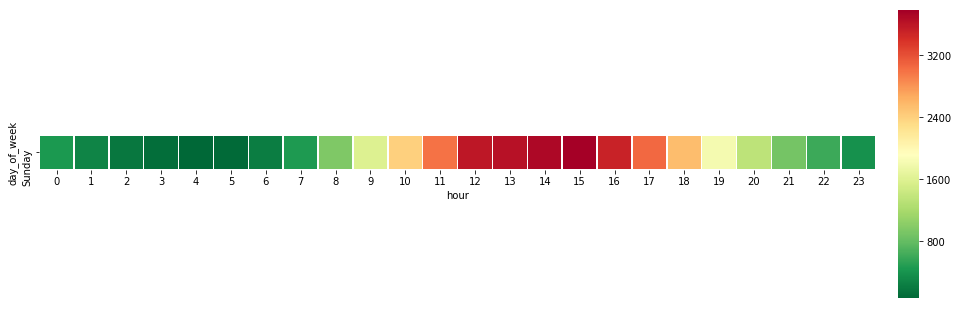

In [36]:
import pandas as pd
import calendar
import datetime
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

CITY_DATA = { 'chicago': 'chicago.csv',
              'new york city': 'new_york_city.csv',
              'washington': 'washington.csv' }
try:
    city = input('which city would you like to check: washington, new york city or chicago? \n')
    month = input('which month would you like to check? Type all to do not apply any filter\n')
    day = input('which day of the week would you like to check? Type all to do not apply any filter \n')
except:
    print('The input you entered is not valid. Check for typos and try again')

def load_data(city, month, day):
    """
    Loads data for the specified city and filters by month and day if applicable.

    Args:
        (str) city - name of the city to analyze
        (str) month - name of the month to filter by, or "all" to apply no month filter
        (str) day - name of the day of week to filter by, or "all" to apply no day filter
    Returns:
        df - pandas DataFrame containing city data filtered by month and day
    """
    
    # load data file into a dataframe
    df = pd.read_csv(CITY_DATA[city])

    # convert the Start Time column to datetime
    df['Start Time'] = pd.to_datetime(df['Start Time'])

    # extract month, day and hour from Start Time to create new columns
    df['month'] = df['Start Time'].dt.month
    df['day_of_week'] = df['Start Time'].dt.weekday_name
    df['hour'] = df['Start Time'].dt.hour

    # filter by month if applicable
    if month != 'all':
        # use the index of the months list to get the corresponding int
        months = ['january', 'february', 'march', 'april', 'may', 'june']
        month = months.index(month) + 1
    
        # filtering = keeps all the row in the df frame within the column 'month' 
        # in which the index match the one calculated above using the list
        df = df[df['month'] == month]

        
        # filter by day of week if applicable
    if day != 'all':
        # filter by day of week to create the new dataframe
        df = df[df['day_of_week'] == day.title()]

    #Popular times of travel statistics    
    popular_month_num = df['month'].mode()[0]
    popular_month_name = datetime.date(2016, popular_month_num, 1).strftime('%B')
    popular_day = df['day_of_week'].mode()[0]
    popular_hour = df['hour'].mode()[0]
    
    #Popular Stations and Trips Statistics
    popular_start = df['Start Station'].mode()[0]
    popular_end = df['End Station'].mode()[0]
    #Creates a new column with Start + End station and calculates the mode
    df['Start End'] = 'from '+ df['Start Station'] + ' to ' + df['End Station']
    popular_start_end = df['Start End'].mode()[0]
    
    #Trip info calculated in hours and minutes
    total_travel = df['Trip Duration'].sum()/3600
    avg_travel = df['Trip Duration'].mean()/60
    
    #User info
    user_types = df['User Type'].value_counts()
    print(user_types)
    # warns the user that no gender or bith date info are available if the city selected was Washington
    if city == 'washington':
        print('No gender or birth data available for Washington')
    # calculates the percentage of men and women 
    else:
        gender_count = df['Gender'].value_counts()
        Male_perc = int((gender_count['Male'] / gender_count.sum()) * 100)
        Female_perc = 100 - Male_perc
        print('During the period selected, out of the ', gender_count.sum(), ' users ', Male_perc, '% were men, and ', Female_perc, '% were women.' )

        # finds the minimum, maximum and the mode for the user birth year
        youngest = df['Birth Year'].max()
        oldest = df['Birth Year'].min()
        common = df['Birth Year'].mode()
        print('The youngest user\'s birth date is' , youngest, ' \nThe oldest user\'s birth date was ', oldest , '\nThe most common birth date for the users was ', common)
    
    # prints the most popular month only if no specific month was delected
    if month == 'all': 
        print('The most popular month was', popular_month_name)
        
    # prints the most popular day only if no specific day was selected
    if day == 'all':
        print('The most popular day was', popular_day)
    
    # print the remaining statistics
    print('The most popular hour was', popular_hour)
    print('The most popular starting station was', popular_start,'\nThe most popular end station was', popular_end,'\nThe most popular trip was', popular_start_end)
    print('Total travel time(hours): ', int(total_travel))
    print('Average travel time(minutes): ', int(avg_travel))

    print('\n \nBelow you can see a visualization of the user behaviors depicting the number of trips per hour within the time specified')
    #creates a second data frame where the data are grouped per day of the week and hour
    df2 = df.groupby(['day_of_week', 'hour'])['End Time'].count().unstack()
    #Define the size of the heatmap
    fig, ax = plt.subplots(figsize=(15,10))
    #resize the color bar for better visibility
    cbar_ax = fig.add_axes([.92, .3, .02, .4])
    #print the heatmap with a green to red color scheme
    sns.heatmap(df2, cmap='RdYlGn_r', linewidths=0.5, annot=False, square = True, ax = ax, cbar_ax = cbar_ax)

try:
    load_data(city, month, day)
        
except:
    print('The input you entered is not valid.\nOnly the cities mentioned can be selected and a specific month raging from January to June')





